In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random

In [3]:
train_dir = "S:/Labs/dl/Birds_25/train"
valid_dir = "S:/Labs/dl/Birds_25/valid"

In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10  # Initial training epochs
FINE_TUNE_EPOCHS = 5  # Additional fine-tuning epochs

In [5]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [6]:
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True)
valid_generator = datagen.flow_from_directory(valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
num_classes = len(train_generator.class_indices)

Found 15000 images belonging to 25 classes.
Found 7500 images belonging to 25 classes.


In [7]:
def create_model():
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze initial layers
    
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model  # Return both model and base_model for fine-tuning

In [8]:
# Optimizers
optimizers = {"SGD": SGD(), "Adam": Adam(), "RMSprop": RMSprop(), "Adagrad": Adagrad()}
history_dict = {}

In [19]:
import pickle

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    
    model = create_model()  # Create a fresh model for each optimizer
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=EPOCHS,
        verbose=1
    )

    history_dict[opt_name] = history.history

    # Save the trained model
    model.save(f"model_{opt_name}.h5")

    # Save training history
    with open(f"history_{opt_name}.pkl", "wb") as f:
        pickle.dump(history.history, f)


Training with SGD optimizer...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1162s 2s/step - accuracy: 0.2766 - loss: 2.5917 - val_accuracy: 0.7116 - val_loss: 1.1314
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1218s 3s/step - accuracy: 0.6600 - loss: 1.1879 - val_accuracy: 0.7651 - val_loss: 0.8482
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - accuracy: 0.7210 - loss: 0.9267 - val_accuracy: 0.7861 - val_loss: 0.7411
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1138s 2s/step - accuracy: 0.7626 - loss: 0.7911 - val_accuracy: 0.7989 - val_loss: 0.6766
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.7835 - loss: 0.7265 - val_accuracy: 0.8088 - val_loss: 0.6450
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 828s 2s/step - accuracy: 0.7903 - loss: 0.6899 - val_accuracy: 0.8097 - val_loss: 0.6299
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 423s 901ms/step - accuracy: 0.8041 - loss: 0.6442 - val_accuracy: 0.8164 - val_loss: 0.6002
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 327s 697ms/step -


Training with Adam optimizer...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 483s 1s/step - accuracy: 0.4818 - loss: 1.8259 - val_accuracy: 0.7896 - val_loss: 0.6954
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.7639 - loss: 0.7599 - val_accuracy: 0.7989 - val_loss: 0.6590
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.7976 - loss: 0.6393 - val_accuracy: 0.8073 - val_loss: 0.6166
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 627s 1s/step - accuracy: 0.8149 - loss: 0.5963 - val_accuracy: 0.8175 - val_loss: 0.5901
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.8241 - loss: 0.5444 - val_accuracy: 0.8295 - val_loss: 0.5457
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy: 0.8314 - loss: 0.5260 - val_accuracy: 0.8243 - val_loss: 0.5771
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 616s 1s/step - accuracy: 0.8484 - loss: 0.4784 - val_accuracy: 0.8369 - val_loss: 0.5372
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy:


Training with RMSprop optimizer...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.4885 - loss: 1.8162 - val_accuracy: 0.7860 - val_loss: 0.7097
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.7591 - loss: 0.8007 - val_accuracy: 0.8053 - val_loss: 0.6411
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.8017 - loss: 0.6523 - val_accuracy: 0.8196 - val_loss: 0.6136
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.8107 - loss: 0.6192 - val_accuracy: 0.8163 - val_loss: 0.5940
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.8194 - loss: 0.5886 - val_accuracy: 0.8224 - val_loss: 0.6148
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 608s 1s/step - accuracy: 0.8353 - loss: 0.5419 - val_accuracy: 0.8228 - val_loss: 0.6069
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.8450 - loss: 0.5044 - val_accuracy: 0.8353 - val_loss: 0.5695
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accura


Training with Adagrad optimizer...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 647s 1s/step - accuracy: 0.1128 - loss: 3.1440 - val_accuracy: 0.4569 - val_loss: 2.2384
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.3857 - loss: 2.2105 - val_accuracy: 0.5943 - val_loss: 1.6956
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 477s 1s/step - accuracy: 0.5156 - loss: 1.7621 - val_accuracy: 0.6560 - val_loss: 1.4171
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.5831 - loss: 1.5255 - val_accuracy: 0.6903 - val_loss: 1.2540
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.6124 - loss: 1.3863 - val_accuracy: 0.7131 - val_loss: 1.1376
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.6380 - loss: 1.2851 - val_accuracy: 0.7255 - val_loss: 1.0671
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 737s 2s/step - accuracy: 0.6592 - loss: 1.2010 - val_accuracy: 0.7367 - val_loss: 1.0053
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 737s 2s/step - accura

ValueError: Unable to synchronously create dataset (name already exists)

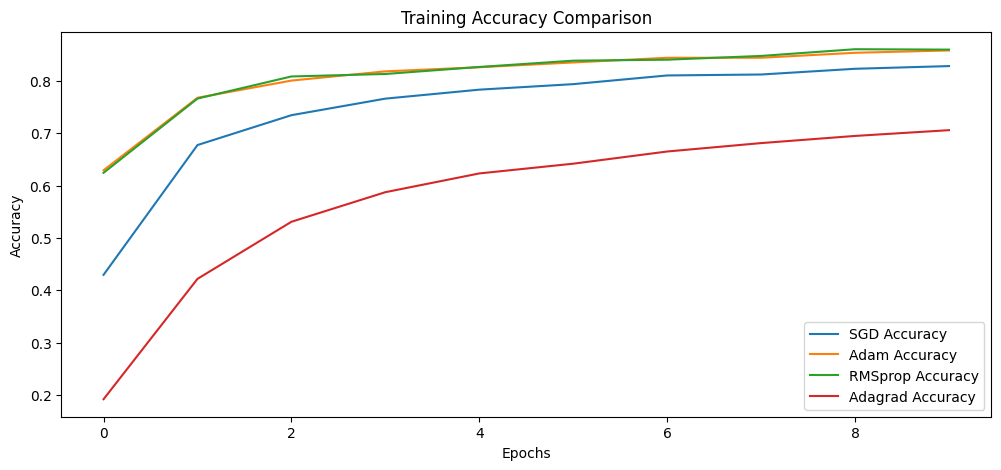

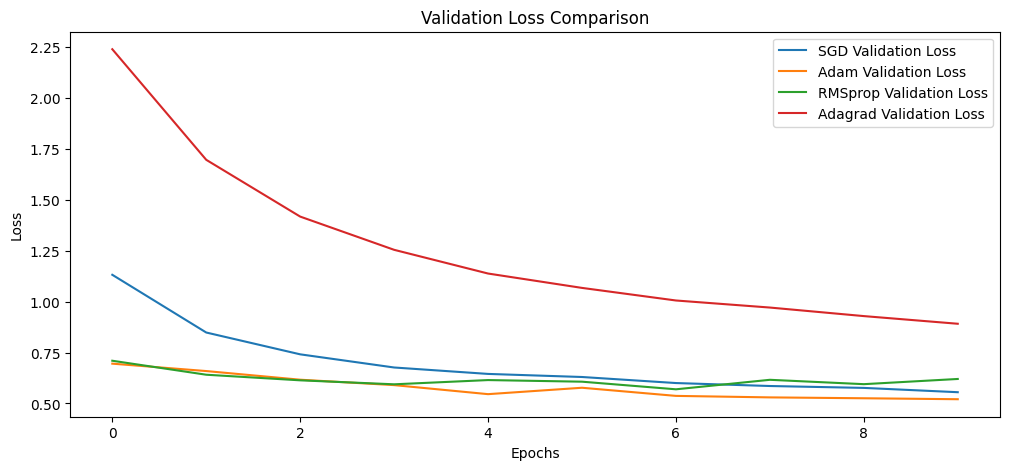

In [20]:
plt.figure(figsize=(12, 5))
for opt_name, hist in history_dict.items():
    plt.plot(hist['accuracy'], label=f'{opt_name} Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for opt_name, hist in history_dict.items():
    plt.plot(hist['val_loss'], label=f'{opt_name} Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


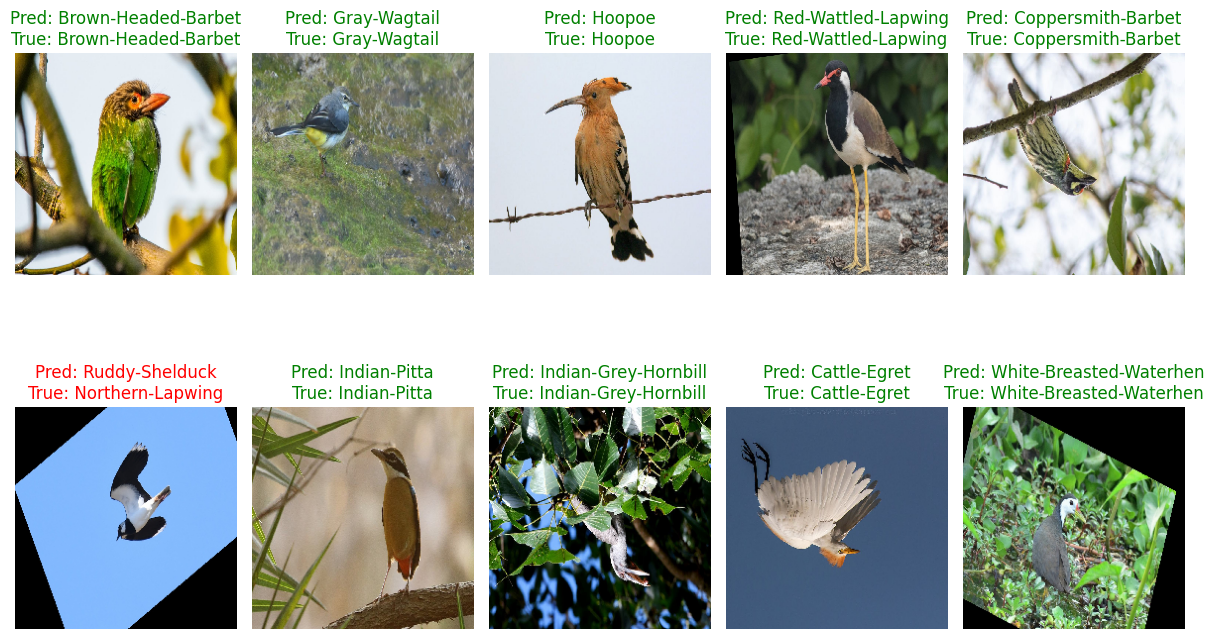

In [24]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix

# Load the pre-trained model
best_model = load_model("model_RMSprop.h5")

# Define validation directory and class labels
valid_dir = "S:/Labs/dl/Birds_25/valid"
class_labels = list(train_generator.class_indices.keys())

# Collect all images from the validation directory
image_paths = []
true_labels = []

for class_name in os.listdir(valid_dir):
    class_path = os.path.join(valid_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        for img in images:
            image_paths.append(os.path.join(class_path, img))
            true_labels.append(class_name)

# Randomly select 10 images
selected_indices = random.sample(range(len(image_paths)), 10)
selected_images = [image_paths[i] for i in selected_indices]
selected_labels = [true_labels[i] for i in selected_indices]

# Display Predictions
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(selected_images):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    pred_probs = best_model.predict(img_array)
    pred_class = np.argmax(pred_probs)
    predicted_label = class_labels[pred_class]

    # Display image with prediction
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    color = "green" if predicted_label == selected_labels[i] else "red"
    plt.title(f"Pred: {predicted_label}\nTrue: {selected_labels[i]}", color=color)

plt.tight_layout()
plt.show()


In [25]:
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))


Classification Report:
                            precision    recall  f1-score   support

    Asian-Green-Bee-Eater       0.68      0.85      0.75        27
      Brown-Headed-Barbet       0.73      0.50      0.59        16
             Cattle-Egret       0.90      1.00      0.95        26
        Common-Kingfisher       0.96      0.87      0.91        30
              Common-Myna       1.00      0.67      0.80        33
         Common-Rosefinch       0.63      0.80      0.71        15
        Common-Tailorbird       0.75      0.86      0.80        28
       Coppersmith-Barbet       0.96      0.76      0.85        33
           Forest-Wagtail       0.85      0.94      0.89        31
             Gray-Wagtail       0.75      0.78      0.76        27
                   Hoopoe       0.96      1.00      0.98        25
               House-Crow       0.65      0.89      0.76        19
     Indian-Grey-Hornbill       0.89      0.64      0.74        25
           Indian-Peacock       0.96